In [ ]:
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

%matplotlib inline

sample = -np.log(1 - np.random.rand(25))
sample

array([0.14165004, 0.2512693 , 2.67631862, 0.15888844, 0.92039002,
       1.39121435, 2.29737793, 0.55635361, 0.25998351, 0.07309637,
       0.2471811 , 1.61531275, 1.29110231, 0.21213644, 1.06745432,
       0.35103329, 0.13355498, 0.58136238, 1.71859937, 0.82562146,
       0.7903703 , 0.42782677, 1.1971796 , 4.10181967, 0.19612431])

In [75]:
# a)

counts = np.unique(sample, return_counts=True)[1]
modes = sample[counts == counts.max()]
median = np.median(sample)
range = np.ptp(sample)
skewness = st.skew(sample)

print(f"{modes = }\n\n{median = }\n\n{range = }\n\n{skewness = }")

modes = array([0.14165004, 0.2512693 , 2.67631862, 0.15888844, 0.92039002,
       1.39121435, 2.29737793, 0.55635361, 0.25998351, 0.07309637,
       0.2471811 , 1.61531275, 1.29110231, 0.21213644, 1.06745432,
       0.35103329, 0.13355498, 0.58136238, 1.71859937, 0.82562146,
       0.7903703 , 0.42782677, 1.1971796 , 4.10181967, 0.19612431])

median = np.float64(0.5813623753402305)

range = np.float64(4.028723298395792)

skewness = np.float64(1.6957340428752494)


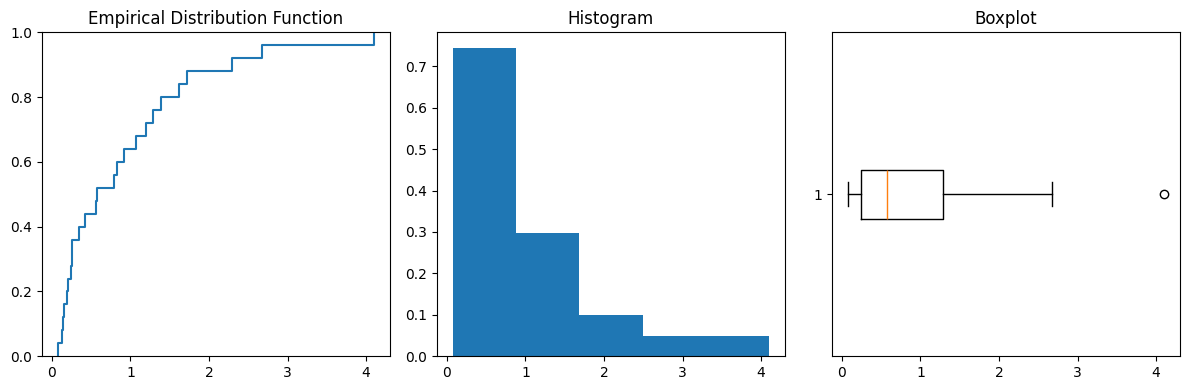

In [105]:
# b)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].ecdf(sample)
ax[0].set_title('Empirical Distribution Function')

ax[1].hist(sample, int(1 + np.log2(sample.size)), density=True)
ax[1].set_title('Histogram')

ax[2].boxplot(sample, orientation="horizontal")
ax[2].set_title('Boxplot')

fig.tight_layout()

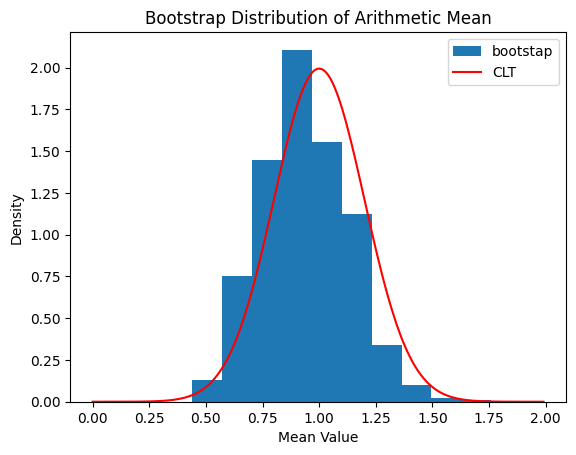

In [116]:
# c)

math_expectation = 1
dispersion = 1
bootstrap = st.bootstrap((sample, ), np.mean, n_resamples=1_000).bootstrap_distribution

x = np.arange(0, 2, 0.01)
y = st.norm.pdf(x, math_expectation, np.sqrt(dispersion/sample.size))

fig, ax = plt.subplots()
ax.hist(bootstrap, density=True, label="bootstap")
ax.plot(x, y, label="CLT", color = "r")

ax.set_title('Bootstrap Distribution of Arithmetic Mean')
ax.set_xlabel('Mean Value')
ax.set_ylabel('Density')
ax.legend()

probability_estimation = 0.212


Text(0, 0.5, 'Density')

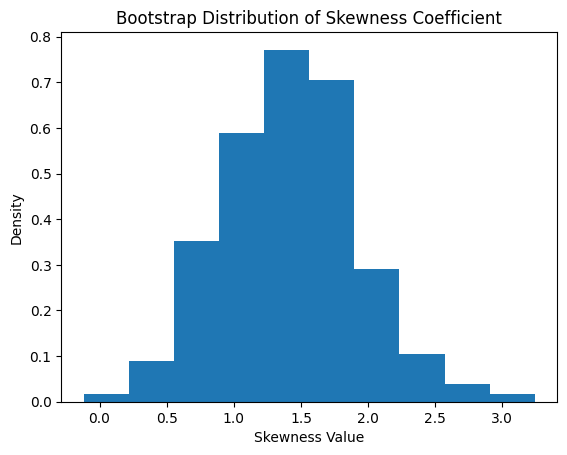

In [92]:
# d)

bootstrap = st.bootstrap((sample, ), st.skew, n_resamples=1000).bootstrap_distribution
probability_estimation = np.count_nonzero(bootstrap < 1) / bootstrap.size

print(f"{probability_estimation = }")

fig, ax = plt.subplots()
ax.hist(bootstrap, density=True)
ax.set_title('Bootstrap Distribution of Skewness Coefficient')
ax.set_xlabel('Skewness Value')
ax.set_ylabel('Density')

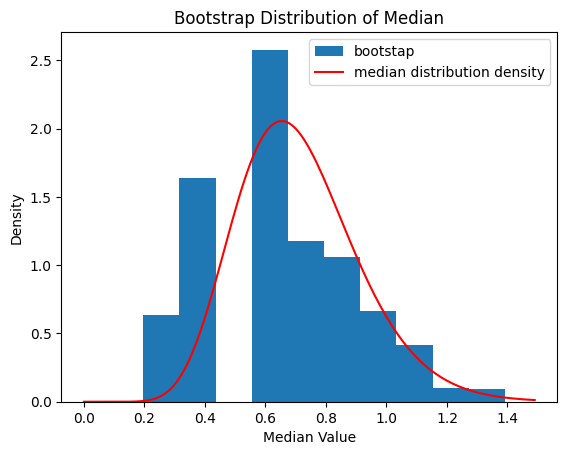

In [115]:
# e)

from scipy.special import comb

bootstrap = st.bootstrap((sample, ), np.median, n_resamples=1000).bootstrap_distribution

x = np.arange(0, 1.5, 0.01)
distr_function = 1 - np.exp(-x)
distr_density = np.exp(-x)
n = sample.size
k = 13
y = n * distr_density * comb(n - 1, k - 1) * np.pow(1 - distr_function, n - k) * np.pow(distr_function, k - 1)

fig, ax = plt.subplots()
ax.hist(bootstrap, density=True, label="bootstap")
ax.plot(x, y, label="median distribution density", color = "r")

ax.set_title('Bootstrap Distribution of Median')
ax.set_xlabel('Median Value')
ax.set_ylabel('Density')
ax.legend()